# Useful Python packages for different data types

<div class="questions">  
### Questions

- What are libraries and packages?
- How can I load tabular data into Python?
- How can I load shapefiles?
- How can I load segy and las data?
</div>

<div class="objectives">  
### Objectives

- Learn how to deal with specialty data types.
- Learn about pandas, pyshp, lasio, obspy.
</div>


Python can deal with basically any type of data you throw at it. The open source python community has developed many packages that make things easy. Today we will look at `pyshp` (for dealing with shapefiles), `pandas` (great for tables and time series), `lasio` (for las format well log data) and `obspy` (a highly featured seismic data processing suite) packages.

Data for this exercised was downloaded from http://www.bom.gov.au/water/groundwater/explorer/map.shtml

# Shapefiles

Shapefiles are a very common file format for GIS data, the standard for which is developed and maintained by ESRI, the makers of the ArcGIS software. Shapefiles collect vectors of features, such as points, lines, polygons. The "file" is actually a misnomer - if you look at a single "shapefile" on your machine using a file explorer, you can see that it's actually made up of several files, three of which are mandatory, and others which may/may not be there. 


In [1]:
#Load the required modules
import shapefile

#NOTE: Weirdly and confusingly, this package is called "pyshp" but you call it via the name "shapefile"

In [2]:
#help(shapefile)
#Or check out the help pages https://github.com/GeospatialPython/pyshp

In [3]:
#Set the filename
boreshape='../data/shp_torrens_river/NGIS_BoreLine.shp'

#read in the file
shapeRead = shapefile.Reader(boreshape)

#And save out some of the shape file attributes
recs    = shapeRead.records()
shapes  = shapeRead.shapes()
fields  = shapeRead.fields
Nshp    = len(shapes)

In [4]:
print(Nshp) #print the Number of items in the shapefile

7635


In [5]:
fields #print the fields

[('DeletionFlag', 'C', 1, 0),
 ['HydroID', 'N', 10, 0],
 ['HydroCode', 'C', 30, 0],
 ['BoreID', 'N', 10, 0],
 ['TopElev', 'F', 19, 11],
 ['BottomElev', 'F', 19, 11],
 ['HGUID', 'N', 10, 0],
 ['HGUNumber', 'N', 10, 0],
 ['NafHGUNumb', 'N', 10, 0],
 ['SHAPE_Leng', 'F', 19, 11]]

In [6]:
recs[3] #print the first record, then this is a list that can be subscripted further

Record #3: [32002002, '652800645', 30027773, -147.26, -154.26, 31000045, 1044, 125005, 0.0]

In [7]:
shapes[1].points #print the point values of the first shape

[(591975.5150000006, -3816141.8817), (591975.5150000006, -3816141.8817)]

In [8]:
shapeRead.shapeTypeName 

'POLYLINEZ'

In [9]:
rec= shapeRead.record(0)
rec['TopElev']

6.74

<div class="challenge">

### Challenge.

- Look at the data above. It provides the coordinates of the wells as points. 
- How many coordinates are provided for each well? Why do you think this is?
- What is the Bottom Elevation of the 300th record?

<details>
<summary>Solution</summary>

There are two coordinates. But they are duplicated.
    
```python
    
rec= shapeRead.record(299)
rec['BottomElev']
    
#or
    
recs[299][4]
```
</details>
</div>

In [12]:
#Here is a slightly neater way to read in the data, but it looks confusing at first.
#But we will need it in this form for our next exercise.

#This type of assignment is known as "list comprehension"
#fields = [x[0] for x in shapeRead.fields][1:]

#Break this down line by line
#for x in shapeRead.fields:
#    print(x)

#Noe just print the 1st (0th) column of each list variable
#for x in shapeRead.fields:
#    print(x[0])

#But we want to save these values in a list (not just print them out).
#fields=[]
#for x in shapeRead.fields:
#    fields.append(x[0])

#And we don't want the DeletionFlag field, so we need to just get all the values except the first
#fields=fields[1:]


#Finally reassign the other variables too
#shps = [s.points for s in shapeRead.shapes()]

Shapefiles are not a native python format, but the community have developed tools for exploring them. The package we have used "pyshp" imported with the name "shapefile" (for some non-consistent weird reason), is one example of working with shapefiles. Alternatives exist.

# Dataframes and table manipulation

Pandas is one of the most useful packages (along with probably numpy and matplotlib). We will use it several times throughout the course for data handling and manipulation. 

In [15]:
#As before, read in the shapefile
boreshape='../data/shp_torrens_river/NGIS_BoreLine.shp'

#Read the shapefile attributes to variables
shapeRead = shapefile.Reader(boreshape)
fields = [x[0] for x in shapeRead.fields][1:]
shps = [s.points for s in shapeRead.shapes()]
recs= shapeRead.records()

In [16]:
import pandas
#Now convert the variables to a pandas dataframe
df = pandas.DataFrame(columns=fields, data=recs)

#See more details at the docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

In [17]:
df

,HydroID,HydroCode,BoreID,TopElev,BottomElev,HGUID,HGUNumber,NafHGUNumb,SHAPE_Leng
0,32001999,652800645,30027773,6.74,-74.26,31000043,1042,104005,0.0
1,32002000,652800645,30027773,-74.26,-125.26,31000109,1108,110002,0.0
2,32002001,652800645,30027773,-125.26,-147.26,31000045,1044,125005,0.0
3,32002002,652800645,30027773,-147.26,-154.26,31000045,1044,125005,0.0
4,32002003,652800645,30027773,-154.26,-168.26,31000045,1044,125005,0.0
...,...,...,...,...,...,...,...,...,...
7630,32145557,662810075,30057044,102.62,90.89,31000139,1138,100001,0.0
7631,32145558,662810075,30057044,103.08,102.62,31000139,1138,100001,0.0
7632,32145559,662813065,30060034,535.08,451.08,31000026,1025,134001,0.0
7633,32145560,662813065,30060034,451.08,171.08,31000014,1013,134001,0.0


In [18]:
#Add a new column called "coords" to the DataFrame 
df = df.assign(coords=shps)

In [19]:
df

,HydroID,HydroCode,BoreID,TopElev,BottomElev,HGUID,HGUNumber,NafHGUNumb,SHAPE_Leng,coords
0,32001999,652800645,30027773,6.74,-74.26,31000043,1042,104005,0.0,"[(591975.5150000006, -3816141.8817), (591975.5..."
1,32002000,652800645,30027773,-74.26,-125.26,31000109,1108,110002,0.0,"[(591975.5150000006, -3816141.8817), (591975.5..."
2,32002001,652800645,30027773,-125.26,-147.26,31000045,1044,125005,0.0,"[(591975.5150000006, -3816141.8817), (591975.5..."
3,32002002,652800645,30027773,-147.26,-154.26,31000045,1044,125005,0.0,"[(591975.5150000006, -3816141.8817), (591975.5..."
4,32002003,652800645,30027773,-154.26,-168.26,31000045,1044,125005,0.0,"[(591975.5150000006, -3816141.8817), (591975.5..."
...,...,...,...,...,...,...,...,...,...,...
7630,32145557,662810075,30057044,102.62,90.89,31000139,1138,100001,0.0,"[(605865.9246000014, -3830429.3729999997), (60..."
7631,32145558,662810075,30057044,103.08,102.62,31000139,1138,100001,0.0,"[(605865.9246000014, -3830429.3729999997), (60..."
7632,32145559,662813065,30060034,535.08,451.08,31000026,1025,134001,0.0,"[(612545.5916999988, -3832402.8148999996), (61..."
7633,32145560,662813065,30060034,451.08,171.08,31000014,1013,134001,0.0,"[(612545.5916999988, -3832402.8148999996), (61..."


Pandas more frequently is used to directly read in tables. So let's read in the csv data that came with shapefile (as this gives us some additional fields not stored in the shapefile that we can explore.

In [20]:
#read in the data
log_data=pandas.read_csv("../data/shp_torrens_river/NGIS_LithologyLog.csv",usecols=list(range(0,13))) 

#What is the "usecols" variable equal to?
#Try reading the data without using the usecols option, can you solve the error?

In [21]:
log_data           # print the first 30 and last 30 rows

,OBJECTID,BoreID,HydroCode,RefElev,RefElevDesc,FromDepth,ToDepth,TopElev,BottomElev,MajorLithCode,MinorLithCode,Description,Source
0,1769789,30062892,662815923,57.25,NGS,18.0,19.5,39.25,37.75,CLYU,None,Clay,SAGeodata
1,1769790,30062892,662815923,57.25,NGS,19.5,22.0,37.75,35.25,ROCK,None,Rocks and sand,SAGeodata
2,1769791,30062892,662815923,57.25,NGS,22.0,24.0,35.25,33.25,CLYU,None,Clay,SAGeodata
3,1770725,30141910,662816624,4.0,NGS,0.0,6.0,4.0,-2.0,None,None,No sample,SAGeodata
4,1770726,30141910,662816624,4.0,NGS,6.0,15.0,-2.0,-11.0,CLYU,None,"Clay - orange-red grey, mottled; stiff-sticky....",SAGeodata
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70168,4120345,30304039,662829228,None,UNK,9.0,10.0,None,None,CLYU,None,Sandy clay,SAGeodata
70169,4120346,30304039,662829228,None,UNK,10.0,12.5,None,None,SAND,None,Clay sand,SAGeodata
70170,4120347,30304050,652802882,None,UNK,0.0,0.3,None,None,FILL,None,Fill,SAGeodata
70171,4120348,30304050,652802882,None,UNK,0.3,0.8,None,None,SAND,None,Clayey sand,SAGeodata


In [22]:
# add a new column as a function of existing columns
log_data['Thickness'] = log_data.ToDepth - log_data.FromDepth

In [23]:
type(log_data)     # see what Python type the DataFrame is

pandas.core.frame.DataFrame

In [24]:
log_data.head(3)    # print the first 3 rows

,OBJECTID,BoreID,HydroCode,RefElev,RefElevDesc,FromDepth,ToDepth,TopElev,BottomElev,MajorLithCode,MinorLithCode,Description,Source,Thickness
0,1769789,30062892,662815923,57.25,NGS,18.0,19.5,39.25,37.75,CLYU,None,Clay,SAGeodata,1.5
1,1769790,30062892,662815923,57.25,NGS,19.5,22.0,37.75,35.25,ROCK,None,Rocks and sand,SAGeodata,2.5
2,1769791,30062892,662815923,57.25,NGS,22.0,24.0,35.25,33.25,CLYU,None,Clay,SAGeodata,2.0


In [25]:
log_data.index     # “the index” (aka “the labels”). 
#Pandas is great for using timeseries data, where the index can be the timestamps

RangeIndex(start=0, stop=70173, step=1)

In [87]:
log_data.columns  # column names (which is “an index”)

Index(['OBJECTID', 'BoreID', 'HydroCode', 'RefElev', 'RefElevDesc',
       'FromDepth', 'ToDepth', 'TopElev', 'BottomElev', 'MajorLithCode',
       'MinorLithCode', 'Description', 'Source', 'Thickness'],
      dtype='object')

In [27]:
log_data.dtypes    # data types of each column

OBJECTID           int64
BoreID             int64
HydroCode          int64
RefElev           object
RefElevDesc       object
FromDepth        float64
ToDepth          float64
TopElev           object
BottomElev        object
MajorLithCode     object
MinorLithCode     object
Description       object
Source            object
Thickness        float64
dtype: object

In [28]:
log_data.shape     # number of rows and columns

(70173, 14)

In [29]:
log_data.values    # underlying numpy array — df are stored as numpy arrays for efficiencies.

array([[1769789, 30062892, 662815923, ..., 'Clay', 'SAGeodata', 1.5],
       [1769790, 30062892, 662815923, ..., 'Rocks and sand', 'SAGeodata',
        2.5],
       [1769791, 30062892, 662815923, ..., 'Clay', 'SAGeodata', 2.0],
       ...,
       [4120347, 30304050, 652802882, ..., 'Fill', 'SAGeodata', 0.3],
       [4120348, 30304050, 652802882, ..., 'Clayey sand', 'SAGeodata',
        0.5],
       [4120349, 30304050, 652802882, ..., 'Sand', 'SAGeodata', 2.7]],
      dtype=object)

In [30]:
#log_data['MajorLithCode']         # select one column
##Equivalent to 
#log_data.MajorLithCode 
##and
#log_data.iloc[:,9]

In [31]:
type(log_data['MajorLithCode'])   # determine datatype of column (e.g., Series)

pandas.core.series.Series

In [32]:
#describe the data frame
log_data.describe(include='all')     

,OBJECTID,BoreID,HydroCode,RefElev,RefElevDesc,FromDepth,ToDepth,TopElev,BottomElev,MajorLithCode,MinorLithCode,Description,Source,Thickness
count,7.017300e+04,7.017300e+04,7.017300e+04,70173,70173,70173.000000,70173.000000,70173,70173,70173,70173,70173,70173,70173.000000
unique,NaN,NaN,NaN,5068,4,NaN,NaN,27784,27883,81,42,33614,54,NaN
top,NaN,NaN,NaN,None,NGS,NaN,NaN,None,None,CLYU,None,Clay,SAGeodata,NaN
freq,NaN,NaN,NaN,18514,44947,NaN,NaN,18514,18514,25861,62812,4603,70119,NaN
mean,2.505677e+06,3.018198e+07,6.624491e+08,NaN,NaN,24.938020,30.621160,NaN,NaN,NaN,NaN,NaN,NaN,5.683139
std,9.276182e+05,8.069609e+04,2.130226e+06,NaN,NaN,45.431762,48.605931,NaN,NaN,NaN,NaN,NaN,NaN,9.942400
min,1.769789e+06,3.002715e+07,6.528000e+08,NaN,NaN,0.000000,0.010000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,1.932741e+06,3.014557e+07,6.628129e+08,NaN,NaN,0.800000,3.960000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,1.999028e+06,3.018487e+07,6.628196e+08,NaN,NaN,7.000000,11.500000,NaN,NaN,NaN,NaN,NaN,NaN,2.800000
75%,3.967146e+06,3.025487e+07,6.628248e+08,NaN,NaN,25.800000,34.700000,NaN,NaN,NaN,NaN,NaN,NaN,7.000000


In [33]:
# summarise a pandas Series
log_data.FromDepth.describe()   # describe a single column

count    70173.000000
mean        24.938020
std         45.431762
min          0.000000
25%          0.800000
50%          7.000000
75%         25.800000
max        610.300000
Name: FromDepth, dtype: float64

In [37]:
#calculate mean of 6th column ("FromDepth")
log_data.iloc[:,5].mean()      

24.93802017870121

In [38]:
#alternate method to calculate mean of FromDepth column (the 6th one)
log_data["FromDepth"].mean()    

24.93802017870121

In [39]:
#Count how many Lith Codes there are
lithCounts=log_data.MajorLithCode.value_counts()

In [40]:
#Print the lithcodes, use .index or .values 
lithCounts

CLYU    25861
SAND    12772
SLAT     4071
FILL     4020
SDST     3209
        ...  
HFLS        1
DIOR        1
DUST        1
CALU        1
REGO        1
Name: MajorLithCode, Length: 81, dtype: int64

<AxesSubplot:>

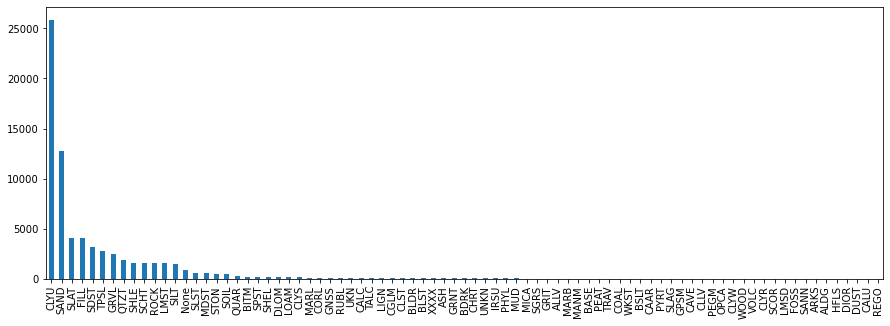

In [41]:
#plot a bar chart of the lith codes
lithCounts.plot.bar(rot=90,figsize=(15,5))

<AxesSubplot:>

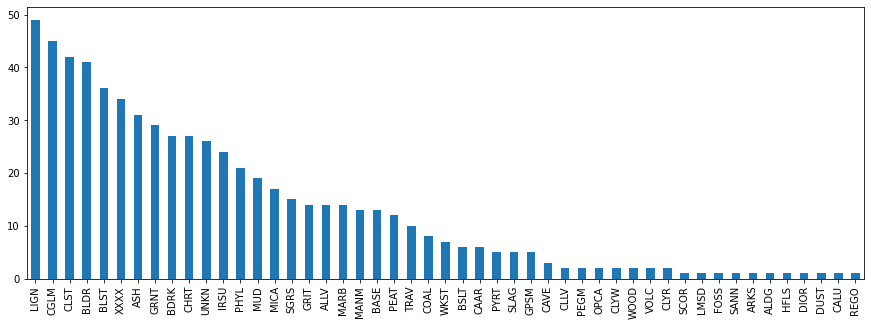

In [42]:
#Plot a bar chart of the lith codes for the rarer lithologies
lithCounts[(lithCounts < 50)].plot.bar(rot=90,figsize=(15,5))

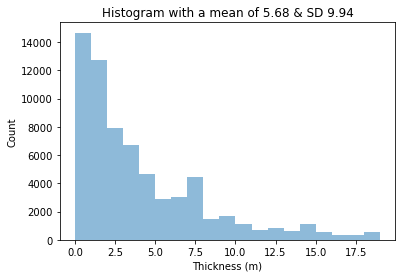

In [102]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
 
# example data
x = log_data.Thickness.values
mu = np.mean(x) # mean of distribution
sigma = np.std(x) # standard deviation of distribution

# the histogram of the data
plt.hist(x, bins=np.arange(0,20,1), alpha=0.5)
plt.xlabel('Thickness (m)')
plt.ylabel('Count')
mystring="Histogram with a mean of "+ str(np.round(mu,2)) + " & SD " + str(np.round(sigma,2))
plt.title(mystring)
 
# Tweak spacing to prevent clipping of ylabel
#plt.subplots_adjust(left=0.15)
plt.show()

np.arange(0,20,1)<div class="challenge">

### Challenge

Plot a histogram of the thickness where the lithcode is MICA. 
    
Hint: to filter a pandas data frame by value use the following syntax:
    
`df[df['Variable'] == "value"]`

<details>
<summary>Solution</summary>

```python
y = log_data[log_data['MajorLithCode'] == "MICA"]['Thickness'].values

plt.hist(y, bins=np.arange(0,20,1), alpha=0.5)
plt.show()
```

</details>
</div>

In [44]:
# import numpy as np
# cmap = plt.get_cmap('viridis')
# colors = cmap(np.linspace(0, 1, len(lithCounts.index)))
# colors

# for row in log_data.itertuples():
#     boreid=row[3]
#     for ind,value in enumerate(recs):  
#         try:
#             value.index(boreid)
#             print(recs)
#         except:
#             continue
#     #(row[3])


#You can plot the location of the bores slowly
# for ind, value in enumerate(recs):
#     #Get the lat lon value
#     lon=df.coords[ind][0][0]
#     lat=df.coords[ind][0][1]
#     #Get the Lithology unit
#     #value[]
    
#     #Now add the point to the plot
#     plt.plot(lon,lat,"|")
    
# plt.show()

# #or fast
# lons= [df.coords[i][0][0] for i in range(1,len(recs))] 
# lats= [df.coords[i][0][1] for i in range(1,len(recs))] 
# plt.plot(lons,lats,"|")
# plt.show()



<div class="challenge">

### Extra credit challenge 

Go to [http://www.bom.gov.au/water/groundwater/explorer/map.shtml](http://www.bom.gov.au/water/groundwater/explorer/map.shtml) and pick another River Region. Download the dataset in "Shapefile" format (this will download the csv also). Once you have the data, follow the same routines as above and see what you can find out about the river region. 


<details>
<summary>Solution</summary>

TODO Nate
    
</details>
</div>

# Log ASCII Files 

Python has a wide range of packages/libraries to do specific tasks. You can often create your own tools for doing niche tasks, but often you will find that many already exist to make things simpler for you. We will explore libraries that work with borehole data (in .las format) with the [lasio](https://lasio.readthedocs.io/en/latest/) library. 

This tutorial based off https://towardsdatascience.com/handling-big-volume-of-well-log-data-with-a-boosted-time-efficiency-with-python-dfe0319daf26

Original Data from:
https://sarigbasis.pir.sa.gov.au/WebtopEw/ws/samref/sarig1/image/DDD/PEDP013LOGS.zip

Title:	Cooper Basin selected well logs in LAS format. \
Publication Date:	November 20 \
Prepared by:	Energy Resources Division, Department of the Premier and Cabinet \
This Record URL:	https://sarigbasis.pir.sa.gov.au/WebtopEw/ws/samref/sarig1/wci/Record?r=0&m=1&w=catno=2040037




In [1]:
#For plotting
import matplotlib.pyplot as plt

#Library specifically for "well data"
import lasio

#To read files
import glob

#For "regular expression manipulation"
import re

In [2]:
#Build a list of filenames to read
read_files = glob.glob("../data/WELL/*.las")
read_files

['../data/WELL\\Balnaves.las',
 '../data/WELL\\Banyula.las',
 '../data/WELL\\Beachport1.las',
 '../data/WELL\\BeachportEast1.las',
 '../data/WELL\\BiscuitFlat1.las',
 '../data/WELL\\BoolLagoon1.las',
 '../data/WELL\\Bungaloo1.las',
 '../data/WELL\\Burrungule1.las']

**Note:** the possibility of Windows VS Unix character interpretations.

In [3]:
#Cut out just the name of the well from the filenames
well_names = []
for file in read_files:
    print("FILE:", file)
    #Split the filepath at a "/" OR a ".las" OR a "\"
    well=re.split(r'/|\\|.las',file)
    print("SPLIT:", well, "\n")
    well_names.append(well[-2])

print("There are ", len(well_names), "wells.")
print(well_names)

FILE: ../data/WELL\Balnaves.las
SPLIT: ['..', 'data', 'WELL', 'Balnaves', ''] 

FILE: ../data/WELL\Banyula.las
SPLIT: ['..', 'data', 'WELL', 'Banyula', ''] 

FILE: ../data/WELL\Beachport1.las
SPLIT: ['..', 'data', 'WELL', 'Beachport1', ''] 

FILE: ../data/WELL\BeachportEast1.las
SPLIT: ['..', 'data', 'WELL', 'BeachportEast1', ''] 

FILE: ../data/WELL\BiscuitFlat1.las
SPLIT: ['..', 'data', 'WELL', 'BiscuitFlat1', ''] 

FILE: ../data/WELL\BoolLagoon1.las
SPLIT: ['..', 'data', 'WELL', 'BoolLagoon1', ''] 

FILE: ../data/WELL\Bungaloo1.las
SPLIT: ['..', 'data', 'WELL', 'Bungaloo1', ''] 

FILE: ../data/WELL\Burrungule1.las
SPLIT: ['..', 'data', 'WELL', 'Burrungule1', ''] 

There are  8 wells.
['Balnaves', 'Banyula', 'Beachport1', 'BeachportEast1', 'BiscuitFlat1', 'BoolLagoon1', 'Bungaloo1', 'Burrungule1']


In [4]:
#Now actually read in the log files to lasio
#The last cell was just to automatically make a nicely formatted list of well names!
lases = []
for files in read_files:
    las = lasio.read(files)
    lases.append(las)

In [5]:
#You can get an idea of what you can interogate using the help function
#help(lases)

In [6]:
#This is just a regular Python list! But the list contains
#in this case, special objects known as "LasFile(s)" or lasio.las object.
#Get some details using help again
#help(lases[1])

In [7]:
#From there we can get some info from each of the wells
j=0
for well in lases:
    #e.g. pull out the varaibles availble from the wells
    print("Wellid:", j, well_names[j])
    j+=1
    print(well.keys())

Wellid: 0 Balnaves
['DEPTH', 'CALI', 'DRHO', 'DT', 'GR', 'MINV', 'MNOR', 'NPHI', 'PEF', 'RDEP', 'RHOB', 'RMED', 'RMIC', 'SP']
Wellid: 1 Banyula
['DEPTH', 'CALI', 'DRHO', 'DT', 'GR', 'NPHI', 'RDEP', 'RHOB', 'RMED', 'SP']
Wellid: 2 Beachport1
['DEPTH', 'CALI', 'MINV', 'MNOR', 'RDEP', 'RMED', 'SP']
Wellid: 3 BeachportEast1
['DEPTH', 'GR', 'RDEP', 'RMED', 'SP']
Wellid: 4 BiscuitFlat1
['DEPTH', 'CALI', 'DRHO', 'DT', 'GR', 'MINV', 'MNOR', 'NPHI', 'PEF', 'RDEP', 'RHOB', 'RMED', 'RMIC', 'SP']
Wellid: 5 BoolLagoon1
['DEPTH', 'CALI', 'DRHO', 'DT', 'GR', 'NPHI', 'PEF', 'RDEP', 'RHOB', 'RMED', 'SP']
Wellid: 6 Bungaloo1
['DEPTH', 'CALI', 'DRHO', 'DT', 'DTS', 'GR', 'NPHI', 'PEF', 'RDEP', 'RHOB', 'RMED', 'RMIC', 'SP']
Wellid: 7 Burrungule1
['DEPTH', 'CALI', 'DT', 'GR', 'RDEP', 'RMED', 'SP']


In [8]:
#Set a wellid you want to explore more
wellid=1

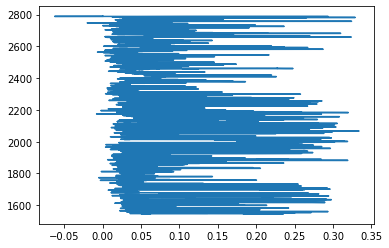

In [9]:
#Make a plot of one of the wells
plt.plot(lases[wellid]['DRHO'],lases[wellid]['DEPTH'])

You have just plotted the density (DRHO) at each measured depth point. You can clean this up and present it better in the next few cells.

In [10]:
#Get some more info out of the well data
print(lases[wellid].curves)

Mnemonic  Unit   Value  Description                                         
--------  ----   -----  -----------                                         
DEPTH     M             Depth                                               
CALI      in            Caliper     CALI Edited, Spliced, BANYU001.G01.lis  
DRHO      g/cm3         DenCorr     DRHO Edited, BANYU001.G01.lis           
DT        us/ft         Sonic       DT Edited, Spliced, BANYU001.G01.lis    
GR        gAPI          GammaRay    GR Spliced, BANYU001.G01.lis            
NPHI      dec           Neutron     NPHI Edited, BANYU001.G01.lis           
RDEP      ohmm          DeepRes     ILD Spliced, BANYU001.G01.lis           
RHOB      g/cm3         Density     RHOB Edited, BANYU001.G01.lis           
RMED      ohmm          MedRes      ILM Spliced, BANYU001.G01.lis           
SP        mV            SponPot     SP Spliced, BANYU001.G01.lis            


<div class="challenge">
    
### Challenge

Run this bit of code. Then add additional mnemonic plots to the figure.

```python
#Import additional packages we will need
import numpy as np
import pandas as pd

#Convert a data array to a pandas dataframe
#and find significant spikes in the data
#Return the spikes as a binary 1 or 0 array
def find_unc(data):
    #Convert data to pandas
    df=pd.DataFrame(data)
    #Caluclate the rolling average 
    #(200 is somewhat arbitray value to take the rolling average over)
    df_mean = df.rolling(200).mean()
    #Calculate the percent change (i.e any points of change) of the data
    df_change = df_mean.pct_change(periods=200)
    #Convert large percent changes to 1 or 0
    #0.5 (50%) is a somewhat arbitray number 
    #to set as the amount of change in the data
    dfbin = ((df_change < -0.5) | (df_change > 0.5)).astype(int)
    #Return the binaray array
    return(dfbin)

#Define a function to make the plot and set parameters
def make_plot(i,var,colour):
    #Set the data to a variable
    data=lases[wellid][var]
    #Find the spikes in the data
    dfbin=find_unc(data)
    #Now perform the plotting
    top=min(lases[wellid]['DEPTH'])
    bot=max(lases[wellid]['DEPTH'])
    ax[i].plot(dfbin*np.nanmax(data), lases[wellid]['DEPTH'], color = 'black', linewidth = 0.5)
    ax[i].plot(data, lases[wellid]['DEPTH'], color = colour, linewidth = 0.5)
    ax[i].set_xlabel(var)
    ax[i].xaxis.label.set_color(colour)
    ax[i].set_xlim(np.nanpercentile(lases[wellid][var],0.5), np.nanpercentile(lases[wellid][var],99.5))
    ax[i].tick_params(axis='x', colors=colour)
    ax[i].title.set_color(colour)
    ax[i].set_ylim(top,bot)
    ax[i].invert_yaxis()
    ax[i].tick_params(left=False,
                bottom=True,
                labelleft=False,
                labelbottom=True)

#Make the figure
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

#Add a plot of each mnemoic to your figure
make_plot(0,"GR","green")
make_plot(1,"RDEP","red")

#Quick way to get the list of keys
#lases[wellid].keys()

#Fix the details on the figure
plt.subplots_adjust(wspace=0.01)
ax[0].set_ylabel("Depth (m)")
ax[0].tick_params(left=True,
            bottom=True,
            labelleft=True,
            labelbottom=True)
```

    
    
<details>
<summary>Solution</summary>

To solve the challenge you can change the ```ncols``` varibale and then add new calls to the ```make_plot``` function.

```python
#Change the number of columns
fig, ax = plt.subplots(nrows=1, ncols=8, figsize=(16,6))
    
#Add additional calls to the make plot
make_plot(0,"CALI","green")
make_plot(1,"DRHO","red")
make_plot(2,"DT","blue")
make_plot(3,"GR","purple")
make_plot(4,"RDEP","cyan")
make_plot(5,"RHOB","pink")
make_plot(6,"RMED","brown")
make_plot(7,"SP","orange")
```
    
    
To learn more about the smoothing steps make a diagnostic plots at each step.
    
```python  
#Set an example dataset, i.e.
#wellid 1 and var is "GR"
data=lases[1]["GR"]

#Convert data to pandas
df=pd.DataFrame(data)

plt.plot(df)
plt.title("Raw data")
plt.show()

#Caluclate the rolling average 
df_mean = df.rolling(200).mean()

plt.plot(df_mean)
plt.title("Smoothed data")
plt.show()

#Calculate the percent change (i.e any points of change) of the data
df_change = df_mean.pct_change(periods=200)

plt.plot(df_change)
plt.title("Percentage changes along the smoothed data")
plt.show()

#Convert large percent changes to 1 or 0
dfbin = ((df_change < -0.2) | (df_change > 0.2)).astype(int)

plt.plot(dfbin)
plt.title("'Binarised' version of large percentage changes")
plt.show()
```

# SEGY Seismic data processing

In [70]:
from obspy.io.segy.segy import _read_segy
import matplotlib.pyplot as plt
import numpy as np

#Adapted from https://agilescientific.com/blog/2016/9/21/x-lines-of-python-read-and-write-seg-y
#See the notebooks here for more good examples
#https://github.com/agile-geoscience/xlines

In [71]:
#Set the filename of the segy data

filename="../data/james/james_1959_pstm_tvfk_gain.sgy"

#Data randomly chosen from here:
#Title: 2006 James 3D Seismic Survey.
#Author: White, A.
#Prepared by: Terrex Seismic Pty Ltd; Pioneer Surveys Pty Ltd; WestenGeco
#Tenement: PPL00182
#Operator: Santos Ltd
#https://sarigbasis.pir.sa.gov.au/WebtopEw/ws/samref/sarig1/wci/Record?r=0&m=1&w=catno=2035790

In [72]:
#This will take about 1 minute. 
#When the [*] changes to [52] and the circle in the top right is clear, it has completed
stream = _read_segy(filename, headonly=True)
print(np.shape(stream.traces))
stream

(48832,)


48832 traces in the SEG Y structure.

Trace sequence number within line: 10001
1001 samples, dtype=float32, 250.00 Hz


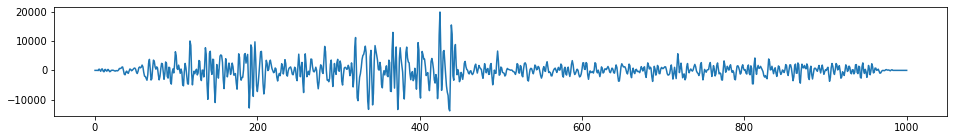

In [73]:
#Look at a single trace
one_trace = stream.traces[10000]

#Print out details single trace
print(one_trace)

plt.figure(figsize=(16,2))
plt.plot(one_trace.data)
plt.show()

In [74]:
#Stack multiple traces into a single numpy array
data = np.stack([t.data for t in stream.traces[12320:12320+500]])

In [75]:
#What does the stacked data look like
data.shape

(500, 1001)

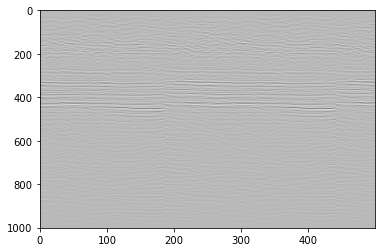

In [76]:
#Have a look at the data
plt.imshow(data.T, cmap="Greys", aspect='auto')

The 95th percentile is 4365; the max amplitude is 34148


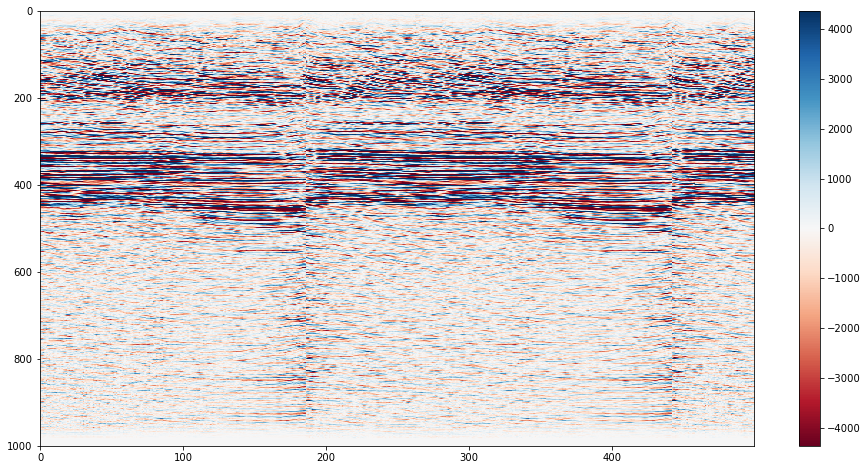

In [80]:
#Make a more informative plot

#Restrict the data to the 95th percentile
vm = np.percentile(data, 95)

print("The 95th percentile is {:.0f}; the max amplitude is {:.0f}".format(vm, data.max()))

#Make the plot
plt.figure(figsize=(16,8))
plt.imshow(data.T, cmap="RdBu", vmin=-vm, vmax=vm, aspect='auto')
plt.colorbar()
plt.show()

In [81]:
#What else is in the data?

#Print out the segy headers
print(stream.textual_file_header.decode())

C 1 CLIENT SANTOS                 COMPANY                       CREW NO         C 2 LINE    2000.00 AREA JAMES3D                                                C 3 REEL NO           DAY-START OF REEL     YEAR      OBSERVER                  C 4 INSTRUMENT  MFG            MODEL            SERIAL NO                       C 5 DATA TRACES/RECORD 24569  AUXILIARY TRACES/RECORD       0 CDP FOLD    40    C 6 SAMPLE INTERVAL  4.00   SAMPLES/TRACE  1001 BITS/IN      BYTES/SAMPLE  4    C 7 RECORDING FORMAT        FORMAT THIS REEL SEG-Y  MEASUREMENT SYSTEM METERS   C 8 SAMPLE CODE FLOATING PT                                                     C09 JAMES 3D                                                                    C10 WESTERNGECO                                                                 C11 MARCH 2007                                                                  C12 VERSION : James3D_pstm_tvfk_gain                                            C13 FILTERED TRIM PSTM STACK            

In [82]:
#And the header information for a particular trace
print(stream.traces[1013].header)

trace_sequence_number_within_line: 1014
trace_sequence_number_within_segy_file: 1014
original_field_record_number: 2004
trace_number_within_the_original_field_record: 1
energy_source_point_number: 10026
ensemble_number: 10026
trace_number_within_the_ensemble: 28
trace_identification_code: 1
number_of_vertically_summed_traces_yielding_this_trace: 1
number_of_horizontally_stacked_traces_yielding_this_trace: 13
data_use: 1
distance_from_center_of_the_source_point_to_the_center_of_the_receiver_group: 0
receiver_group_elevation: 0
surface_elevation_at_source: 0
source_depth_below_surface: 0
datum_elevation_at_receiver_group: 0
datum_elevation_at_source: 0
water_depth_at_source: 0
water_depth_at_group: 0
scalar_to_be_applied_to_all_elevations_and_depths: 1
scalar_to_be_applied_to_all_coordinates: 1
source_coordinate_x: 482760
source_coordinate_y: 7035836
group_coordinate_x: 482760
group_coordinate_y: 7035836
coordinate_units: 1
weathering_velocity: 0
subweathering_velocity: 0
uphole_time_at_

In [83]:
#You can automatically extract data you might need from the header
#Get the sample interval from the header info
dt = stream.traces[0].header.sample_interval_in_ms_for_this_trace / 1e6
dt

0.004

<div class="challenge">

### Challenge

A single seismic section can be viewed with this snippet of code:
 
```python
#Set number of xlines
n=262
#Set start iline
m=0

print(m,m*n,m*n+n)
data = np.stack(t.data for t in stream.traces[m*n:m*n+n])
vm = np.percentile(data, 95)
plt.figure(figsize=(14,4))
plt.imshow(data.T,cmap="RdBu", vmin=-vm, vmax=vm, aspect='auto')
plt.show()
```
    
Can you put this in a loop to show multiple sections at once?
    
    
<details>
<summary>Solution</summary>

...    
```python
#Set number of xlines
n=262
#Set start iline
m=0

while m < 10:
    print(m,m*n,m*n+n)
    data = np.stack(t.data for t in stream.traces[m*n:m*n+n])
    vm = np.percentile(data, 95)
    plt.figure(figsize=(14,4))
    plt.imshow(data.T,cmap="RdBu", vmin=-vm, vmax=vm, aspect='auto')
    plt.show()
    m=m+1
```

<div class="keypoints">
### Key points
    
- Obspy can be used to work with segy seismic data
- Lasio can be used to work with well log data
- Pyshp can be used to work with Shapefiles
- Pandas dataframes are the best format for working with tabular data of mixed numeric/character types
- Numpy arrays are faster when working with purely numeric data
</div>